# <center> Agglomerative Clustering

## Import required packages

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.spatial.distance import pdist, squareform
from sklearn import metrics

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 50)

## Read Dataset

### Load Data

In [2]:
univ_df = pd.read_csv('../data/Universities_Clustering.csv')
univ_df.shape
univ_df.head()
univ_df.describe()

(25, 8)

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


### Data PreProcessing

In [3]:
univ_df.set_index('Univ', inplace=True)
univ_df.drop(['State'], axis=1, inplace=True)

# while not required, the conversion of integer data to float will avoid a warning when 
# applying the scale function
univ_df = univ_df.apply(lambda x: x.astype('float64'))
univ_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,1310.0,89.0,22.0,13.0,22704.0,94.0
CalTech,1415.0,100.0,25.0,6.0,63575.0,81.0
CMU,1260.0,62.0,59.0,9.0,25026.0,72.0
Columbia,1310.0,76.0,24.0,12.0,31510.0,88.0
Cornell,1280.0,83.0,33.0,13.0,21864.0,90.0


### Distance Between Two Universities

In [4]:
d = pairwise.pairwise_distances(univ_df, metric='euclidean')
pd.DataFrame(d, columns=univ_df.index, index=univ_df.index).head(5)

# Another way to calculate distance
# pd.DataFrame(squareform(pdist(univ_df, 'euclidean')), index=univ_df.index, columns= univ_df.index).head()

Univ,Brown,CalTech,CMU,Columbia,Cornell,Dartmouth,Duke,Georgetown,Harvard,JohnsHopkins,MIT,Northwestern,NotreDame,PennState,Princeton,Purdue,Stanford,TexasA&M,UCBerkeley,UChicago,UMichigan,UPenn,UVA,UWisconsin,Yale
Univ,,,,,,,,,,,,,,,,,,,,,,,,,
Brown,0.000000,40871.139133,2323.097501,8806.011924,840.638448,9458.048160,8881.005180,2578.632002,16821.243176,35987.010976,12166.205777,5348.264952,7582.230081,12521.247861,7516.287315,13641.740175,13746.091190,14002.132802,7564.365671,15676.045579,7235.360254,4849.095070,9355.419980,10849.570360,20810.102787
CalTech,40871.139133,0.000000,38549.346505,32065.182239,41711.224257,31413.094897,31990.161878,43449.304195,24050.014719,4885.343284,28705.024421,35523.345338,48453.273130,53391.089950,33355.030010,54510.631101,27125.061382,54872.098219,48435.320067,25195.336572,48105.607158,36022.243281,50226.370076,51719.108084,20061.047630
CMU,2323.097501,38549.346505,0.000000,6484.322787,3162.293630,7136.627425,6559.395475,4900.183976,14499.796412,33665.039329,9844.844488,3026.201910,9904.059319,14842.104568,5195.599773,15962.106722,11424.558241,16323.064142,9886.098624,13354.052082,9556.350977,2527.357315,11677.089920,13170.186293,18488.446068
Columbia,8806.011924,32065.182239,6484.322787,0.000000,9646.053649,652.860628,77.012986,11384.133740,8015.530675,27181.008315,3360.784581,3458.405991,16388.104070,21326.286831,1291.787521,22446.229773,4940.277017,22807.280614,16370.172327,6870.078529,16040.591697,3957.099822,18161.210505,19654.379995,12004.194767
Cornell,840.638448,41711.224257,3162.293630,9646.053649,0.000000,10298.183044,9721.067328,1738.227833,17661.421206,36827.011608,13006.389814,6188.035957,6742.053841,11680.806179,8356.568434,12801.217911,14586.227202,13161.709995,6724.145224,16516.013986,6394.905707,5689.004131,8515.187138,10009.075082,21650.217204


### Standardising the Variables

In [5]:
# Get column names first
names = univ_df.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_univ_df = scaler.fit_transform(univ_df)
scaled_univ_df = pd.DataFrame(scaled_univ_df, columns=names, index=univ_df.index)
scaled_univ_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
CalTech,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
CMU,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
Columbia,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
Cornell,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


### Distance Between Two Universities (After Standardisation)

In [6]:
d_norm_scaled = pairwise.pairwise_distances(scaled_univ_df, metric='euclidean')
pd.DataFrame(d_norm_scaled, columns=univ_df.index, index=univ_df.index).head(5)

Univ,Brown,CalTech,CMU,Columbia,Cornell,Dartmouth,Duke,Georgetown,Harvard,JohnsHopkins,MIT,Northwestern,NotreDame,PennState,Princeton,Purdue,Stanford,TexasA&M,UCBerkeley,UChicago,UMichigan,UPenn,UVA,UWisconsin,Yale
Univ,,,,,,,,,,,,,,,,,,,,,,,,,
Brown,0.000000,3.863860,3.616124,1.176890e+00,0.842429,1.053437,0.804233,1.023064,1.638147,3.348209,1.448064,1.323604,1.342881,4.406156,1.557819,6.482715,1.121088,5.834081,2.438323,2.127651,3.257120,1.173113,1.698675,4.958166,1.723019
CalTech,3.863860,0.000000,4.271141,3.256603e+00,3.925392,3.046208,3.332906,4.170369,2.878763,2.098327,2.583979,3.461280,4.585223,6.789665,2.999873,8.237940,2.896466,7.902067,4.781778,3.391626,5.595666,3.467687,4.880857,6.673246,2.598619
CMU,3.616124,4.271141,0.000000,2.840556e+00,2.869218,3.616868,3.490029,3.073076,4.326452,3.167054,3.388860,2.548862,3.068399,3.393157,3.978382,4.383526,3.733617,4.630771,2.996912,2.349402,2.549038,2.600487,2.943953,2.732600,4.211373
Columbia,1.176890,3.256603,2.840556,1.490116e-08,1.005659,1.193633,1.123086,1.063631,1.737758,2.522115,1.359165,1.087641,1.751878,4.049674,1.703223,6.037992,1.115697,5.541048,2.510166,1.469559,3.069972,0.822893,1.954617,4.433446,1.741929
Cornell,0.842429,3.925392,2.869218,1.005659e+00,0.000000,1.449597,1.058944,0.790275,2.203575,3.118713,1.634372,0.774035,0.844977,3.715555,2.045615,5.695138,1.548410,5.163462,1.931932,1.561660,2.479606,0.681922,1.080857,4.156759,2.185834


### Agglomerative clustering - Single Linkage

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Single linkage)')

Text(0.5, 0, 'University')

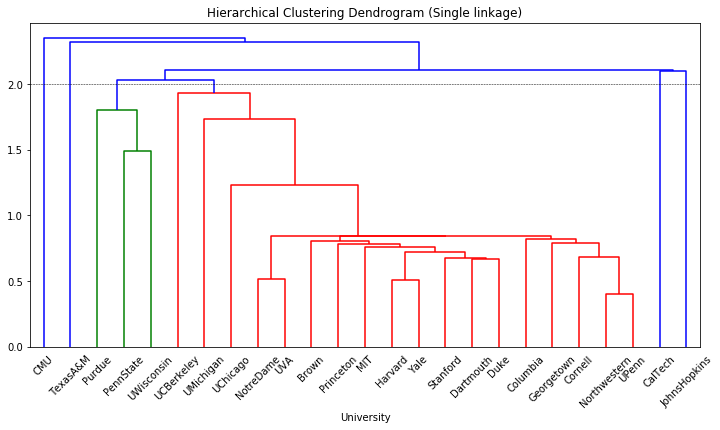

In [7]:
Z = linkage(scaled_univ_df, method='single')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.13)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('University')
dd = dendrogram(Z, labels=scaled_univ_df.index, color_threshold=2)
plt.axhline(y=2, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

### Agglomerative clustering - Average Linkage

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Average linkage)')

Text(0.5, 0, 'University')

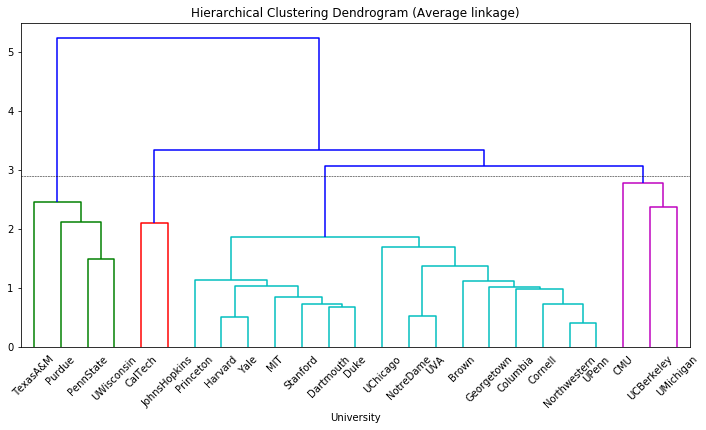

In [8]:
Z = linkage(scaled_univ_df, method='average')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.13)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('University')
dd = dendrogram(Z, labels=scaled_univ_df.index, color_threshold=2.9)
plt.axhline(y=2.9, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

linkage takes the values - single, complete, average, centroid, median, ward

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Complete linkage)')

Text(0.5, 0, 'University')

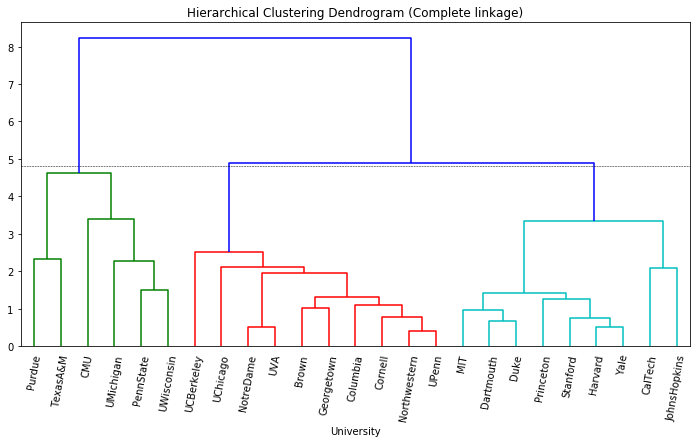

In [9]:
Z = linkage(scaled_univ_df, method='complete')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.13)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('University')
dd = dendrogram(Z, labels=scaled_univ_df.index, color_threshold=4.8, leaf_rotation= 80)
plt.axhline(y=4.8, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

Optimal number of clusters looks to be between 3 and 5

let's evaluate usefulness of clustering activity

### From Dendrograms to Clusters

In [10]:
memb = fcluster(linkage(scaled_univ_df, 'complete'), 3, criterion='maxclust')
memb = pd.Series(memb, index=scaled_univ_df.index)
pd.DataFrame(memb, columns = ['Cluster']).head()

,Cluster
Univ,
Brown,2
CalTech,3
CMU,1
Columbia,2
Cornell,2


In [11]:
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  CMU, PennState, Purdue, TexasA&M, UMichigan, UWisconsin
2 :  Brown, Columbia, Cornell, Georgetown, Northwestern, NotreDame, UCBerkeley, UChicago, UPenn, UVA
3 :  CalTech, Dartmouth, Duke, Harvard, JohnsHopkins, MIT, Princeton, Stanford, Yale


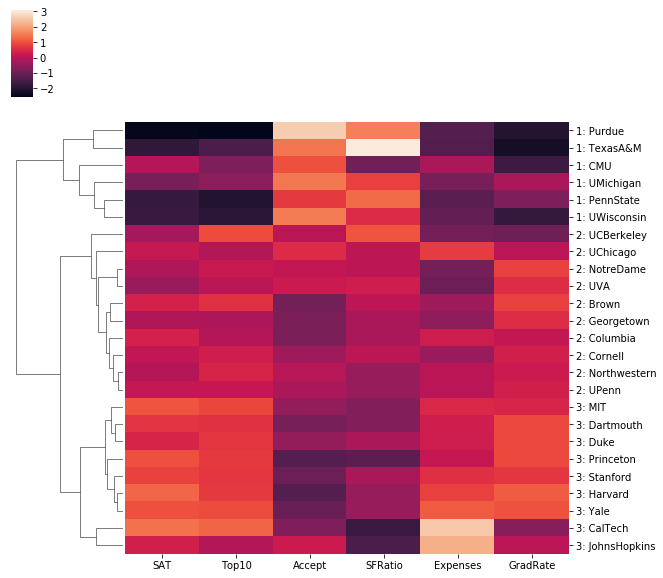

In [12]:
scaled_univ_df.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, scaled_univ_df.index)]
sns.clustermap(scaled_univ_df, method='complete', col_cluster=False)
plt.show()

<p> 


</p>

# <center> K-Means Clustering

### Loading Data and Standardising the Variables

In [13]:
univ_df = pd.read_csv('../data/Universities_Clustering.csv')
univ_df.set_index('Univ', inplace=True)
univ_df.drop(['State'], axis=1, inplace=True)
univ_df = univ_df.apply(lambda x: x.astype('float64'))

# Get column names first
names = univ_df.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_univ_df = scaler.fit_transform(univ_df)
scaled_univ_df = pd.DataFrame(scaled_univ_df, columns=names, index=univ_df.index)
scaled_univ_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
CalTech,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
CMU,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
Columbia,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
Cornell,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


### Visualize data using variables SAT and Top10

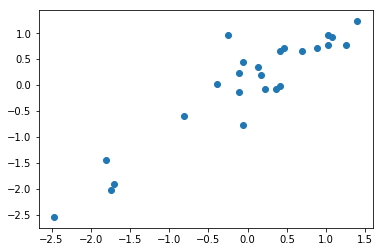

In [14]:
plt.scatter(scaled_univ_df.SAT, scaled_univ_df.Top10)
#sns.pairplot(scaled_univ_df)

### Perform K-Means clustering using 3 clusters

In [15]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_univ_df)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=scaled_univ_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  CalTech, Dartmouth, Duke, Harvard, JohnsHopkins, MIT, Princeton, Stanford, Yale
1 :  PennState, Purdue, TexasA&M, UWisconsin
2 :  Brown, CMU, Columbia, Cornell, Georgetown, Northwestern, NotreDame, UCBerkeley, UChicago, UMichigan, UPenn, UVA


### Add Labels to the dataset

In [16]:
univ_df['Cluster'] = kmeans.labels_
univ_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
Univ,,,,,,,
Brown,1310.0,89.0,22.0,13.0,22704.0,94.0,2
CalTech,1415.0,100.0,25.0,6.0,63575.0,81.0,0
CMU,1260.0,62.0,59.0,9.0,25026.0,72.0,2
Columbia,1310.0,76.0,24.0,12.0,31510.0,88.0,2
Cornell,1280.0,83.0,33.0,13.0,21864.0,90.0,2


### Centroid of each Cluster

In [17]:
# Centroids created on standardised dataset
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_univ_df.columns)
centroids

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.907388,0.739213,-0.769148,-0.766173,0.975621,0.619985
1,-1.930292,-1.981486,1.593482,1.638574,-1.233599,-1.686804
2,-0.037110,0.106085,0.045701,0.028439,-0.320516,0.097279


In [18]:
# Centroids created on original dataset
metric_cols = univ_df.columns.tolist()
metric_cols.remove('Cluster')

centroids = univ_df.groupby('Cluster')[metric_cols].mean()
centroids

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,
0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


### Visualising Centroids - Bar Plot 

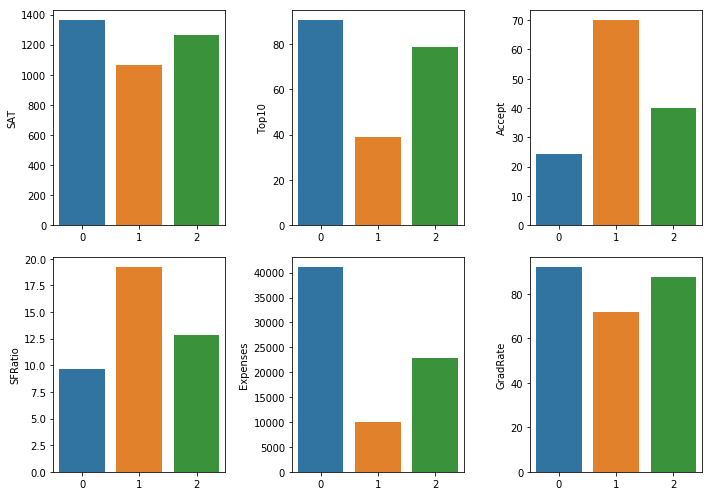

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
for idx, feat in enumerate(metric_cols):
    ax = axes[int(idx / 3), idx % 3]
    sns.barplot(x=centroids.index, y=feat, data=centroids, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

### Visualising Centroids - Parallel Co-ordinate plot

<Figure size 720x432 with 0 Axes>

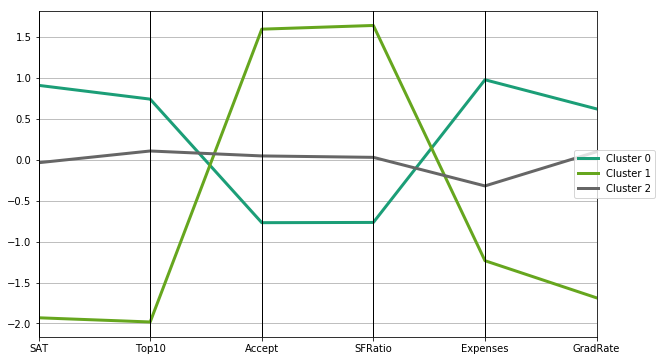

In [20]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_univ_df.columns)
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=3)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))

### Choosing the optimal number of clusters for K-means

#### 1. Elbow Method

#### Total Within Cluster Sum of Square

In [21]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(scaled_univ_df)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=scaled_univ_df.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (9 members): 14.88 within cluster 
Cluster 1 (4 members): 7.38 within cluster 
Cluster 2 (12 members): 22.27 within cluster 


Text(0.5, 1.0, 'Optimal Clusters - Elbow Method')

Text(0.5, 0, 'Number of cluster')

Text(0, 0.5, 'SSE')

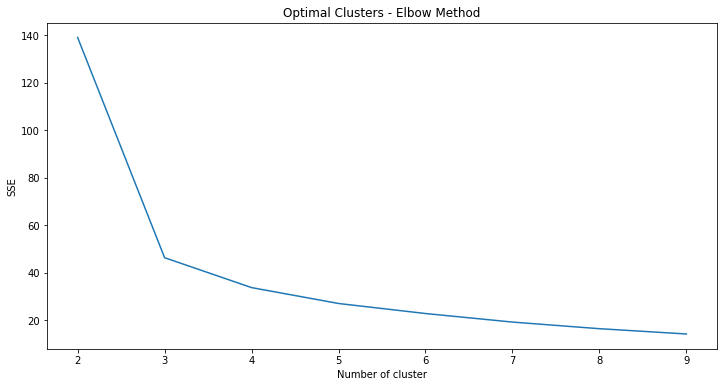

In [25]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(scaled_univ_df)
    scaled_univ_df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

fig = plt.figure(figsize=(12, 6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('Optimal Clusters - Elbow Method')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### Average Silhouette Method

Text(0.5, 1.0, 'Optimal Clusters - Silhouette Method')

Text(0.5, 0, 'Number of cluster')

Text(0, 0.5, 'Avg. Silhouette Coefficient')

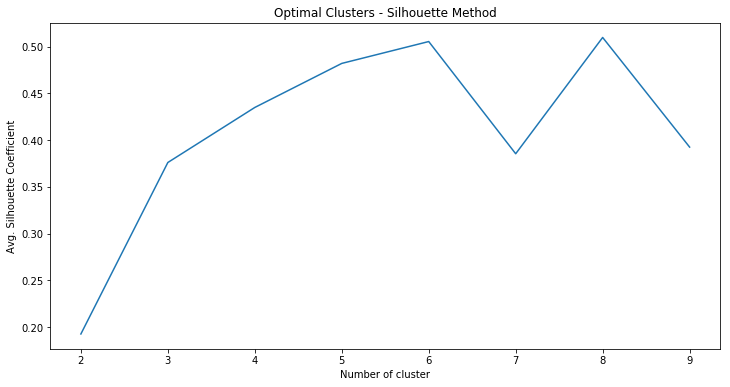

In [26]:
silhouette = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(scaled_univ_df)
    scaled_univ_df["clusters"] = kmeans.labels_
    silhouette[k] = metrics.silhouette_score(scaled_univ_df, kmeans.labels_, metric='euclidean')

fig = plt.figure(figsize=(12, 6))
plt.plot(list(silhouette.keys()), list(silhouette.values()))
plt.title('Optimal Clusters - Silhouette Method')
plt.xlabel("Number of cluster")
plt.ylabel("Avg. Silhouette Coefficient")
plt.show()

#### Calinski-Harabasz Index

Text(0.5, 1.0, 'Optimal Clusters - CH Index')

Text(0.5, 0, 'Number of cluster')

Text(0, 0.5, 'CH Index')

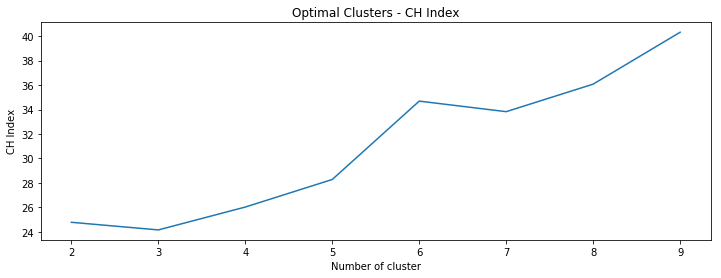

In [24]:
CH = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(scaled_univ_df)
    CH[k] = metrics.calinski_harabaz_score(scaled_univ_df, kmeans.labels_)

fig = plt.figure(figsize=(12, 4))
plt.plot(list(CH.keys()), list(CH.values()))
plt.title('Optimal Clusters - CH Index')
plt.xlabel("Number of cluster")
plt.ylabel("CH Index")
plt.show()